In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
import tensorflow as tf

In [27]:
data = pd.read_csv("./data/train.csv", header=0)
num = data.shape[0]

In [28]:
data = data[["OverallQual", "GrLivArea", "SalePrice"]]
cols = ["OverallQual", "GrLivArea", ""]

In [29]:
X = tf.convert_to_tensor(np.column_stack((np.ones((num,)), *data[["GrLivArea"]].to_numpy())), dtype="float32")
Y = tf.convert_to_tensor(data["SalePrice"].to_numpy().reshape((-1, 1)), dtype="float32")
B = tf.Variable(tf.zeros((3, 1), dtype="float32"))

In [49]:
@tf.function
def calc(x,y,b):
    return tf.reduce_sum(tf.square(tf.matmul(x,b) - y))

In [50]:
import time

EPOCHS = 1000000

optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.1)
loss_fn = tf.keras.losses.MeanSquaredError()

start = time.time()

for epoch in range(EPOCHS):
    with tf.GradientTape() as tape:
        loss = calc(X, Y, B)
    grads = tape.gradient(loss, B)
    optimizer.apply_gradients(zip([grads], [B]))
    end = time.time()
    print(f"{epoch}, {loss.numpy()} {(time.time() - start)*1000:.2f}ms", end="\r", flush=True)
    start = end

KeyboardInterrupt: 

In [76]:
test = pd.read_csv("./data/test.csv", header=0)

In [77]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [78]:
test_X = np.column_stack((np.ones((test.shape[0],)), test["GrLivArea"], test["OverallQual"]))

In [79]:
predictions = np.matmul(test_X, B.numpy())

In [80]:
predictions.flatten().shape

(1459,)

In [81]:
pred_data = pd.DataFrame({
    "Id": test["Id"].to_numpy(),
    "GrLivArea": test["GrLivArea"].to_numpy(),
    "OverallQual": test["OverallQual"].to_numpy(),
    "SalePrice": predictions.flatten()
})

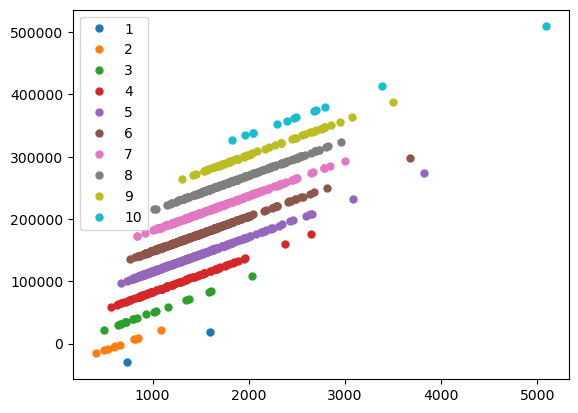

In [82]:
groups = pred_data.groupby("OverallQual")
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group["GrLivArea"], group["SalePrice"], marker='o', linestyle='', ms=5, label=name)
ax.legend()

plt.show()

In [1]:
pred_data[["Id", "SalePrice"]].to_csv("./predictions.csv", index=False)

NameError: name 'pred_data' is not defined